<a href="https://colab.research.google.com/github/preeyam2000sahu/Human-Activity-Classifier/blob/main/Human_ACtivity_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [11]:
!kaggle competitions download -c human-activity-recognition-with-rnn

  0% 0.00/15.4k [00:00<?, ?B/s]
100% 15.4k/15.4k [00:00<00:00, 2.36MB/s]
  0% 0.00/67.0 [00:00<?, ?B/s]
100% 67.0/67.0 [00:00<00:00, 9.04kB/s]
  0% 0.00/80.0 [00:00<?, ?B/s]
100% 80.0/80.0 [00:00<00:00, 23.7kB/s]
 52% 9.00M/17.5M [00:00<00:00, 26.1MB/s]
100% 17.5M/17.5M [00:00<00:00, 39.4MB/s]
 71% 5.00M/7.04M [00:00<00:00, 44.8MB/s]
100% 7.04M/7.04M [00:00<00:00, 44.0MB/s]
  0% 0.00/2.74k [00:00<?, ?B/s]
100% 2.74k/2.74k [00:00<00:00, 763kB/s]


In [12]:
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
df=pd.read_csv('./train.csv',header=0,index_col=False)

In [16]:
df.head()

,id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.

In [17]:
df=df.drop(['id','subject'],axis=1)

In [18]:
X=df.drop(['activity'],axis=1)
Y=df['activity']
Y_train=Y.to_numpy()
Y_train=Y_train-1
X_train=X.to_numpy()
print (X_train.shape)
print (Y_train.shape)

(7352, 561)
(7352,)


In [19]:
X_train=X_train.reshape(1,7352,561)
Y_train=Y_train.reshape(1,7352,1)

The cell below is not part of the designed LSTM.

In [ ]:
#  model=tf.keras.models.Sequential([
#                                   tf.keras.layers.Dense(4096,activation='relu'),
#                                    tf.keras.layers.Dropout(0.5),
#                                   tf.keras.layers.Dense(2048,activation='relu'),
#                                    tf.keras.layers.Dropout(0.4),
#                                   tf.keras.layers.Dense(1024,activation='relu'),
#                                    tf.keras.layers.Dropout(0.3),
#                                   tf.keras.layers.Dense(512,activation='relu'),
#                                    tf.keras.layers.Dense(256,activation='relu'),
#                                    tf.keras.layers.Dropout(0.2),
#                                    tf.keras.layers.Dense(128,activation='relu'),
#                                    tf.keras.layers.Dense(64,activation='relu'),
#                                    tf.keras.layers.Dense(32,activation='relu'),
#                                    tf.keras.layers.Dense(16,activation='relu'),
#                                    tf.keras.layers.Dense(8,activation='relu'),
#                                   tf.keras.layers.Dense(6,activation='softmax')
# ])

In [20]:
 model=tf.keras.models.Sequential([
                                  
                                   tf.keras.layers.LSTM(units=1024,dropout=0.3,recurrent_dropout=0.3,return_sequences=True,time_major=True),
                                   tf.keras.layers.LSTM(units=256,dropout=0.1,recurrent_dropout=0.1,return_sequences=True,time_major=True),
                                  tf.keras.layers.LSTM(units=6,return_sequences=True,activation='softmax',time_major=True)
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
x=model.fit(X_train,Y_train,epochs=100,batch_size=512,verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.1132 - accuracy: 0.9554
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 0.1187 - accuracy: 0.9536
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 0.1061 - accuracy: 0.9592
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 0.1033 - accuracy: 0.9587
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 0.0921 - accuracy: 0.9655
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 0.0985 - accuracy: 0.9630
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 0.0982 - accuracy: 0.9614
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 0.0964 - accuracy: 0.9645
Epoch 9/100
1/1 [==============================] - 7s 7s/step - loss: 0.0951 - accuracy: 0.9650
Epoch 10/100
1/1 [==============================] - 7s 7s/step - loss: 0.0927 - accuracy: 0.9648
Epoch 11/100
1/1 [=====================

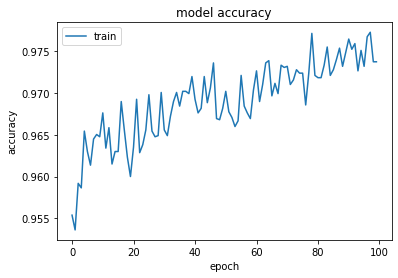

In [35]:
plt.plot(x.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

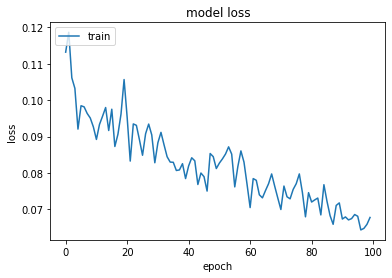

In [36]:
plt.plot(x.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [23]:
df_test=pd.read_csv('./test.csv',header=0,index_col=False)

In [24]:
df_test=df_test.drop(['id','subject'],axis=1)
X_test=df_test.to_numpy()

In [25]:
X_test=X_test.reshape(1,2947,561)

In [26]:
Y_test=model.predict(X_test)
print (Y_test)

[[[2.06275454e-05 3.58631150e-05 4.91175742e-05 1.43415516e-03
   1.08161986e-01 1.61047465e-05]
  [2.11196566e-05 2.89573072e-05 2.00668728e-05 1.15090879e-02
   4.07815650e-02 2.26629763e-05]
  [2.77018680e-05 1.75554160e-05 3.72272370e-05 2.76589277e-03
   1.21746041e-01 1.33315179e-05]
  ...
  [4.27440566e-04 1.99279681e-01 3.59960599e-04 8.22746806e-05
   1.43916084e-04 8.25761817e-05]
  [6.33213960e-04 1.19462915e-01 3.05499008e-04 1.48886873e-04
   1.17037234e-04 5.94999183e-05]
  [3.04509653e-03 3.22703756e-02 2.73301703e-04 1.01269448e-04
   1.42910430e-04 4.02249607e-05]]]


In [27]:
Y_test=Y_test.reshape(2947,6)

In [28]:
Y_test_f=np.argmax(Y_test,axis=1)
Y_test_f=Y_test_f+1
Y_test_f=np.array(Y_test_f)

In [29]:
df=pd.DataFrame(data=Y_test_f,columns=['activity'],index=[i for  i in range(len(Y_test))])

In [30]:
df.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [31]:
df.to_csv("./lstm_out.csv")